In [10]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler


# Reading the data-set
df = pd.read_csv('Income.csv')

In [11]:
# Data summary/information

# Data link:
# https://www.kaggle.com/datasets/uciml/adult-census-income

# I took fascination in this data set as predicting incomes interests me greatly, and understanding
# income and similar features is interesting. The data was extracted from the 1994 Census Bureau database. Column
# represents the information of those people living in the USA. The goal is to predict a person makes over 50k per year
# based on selected features. However, before doing that, I will be deep-diving into several different analyses to
# understand correlation in the data, clean the data, and perform my interpretation and commentary on 
# whether, based on the columns below, can successfully predict whether somebody makes the above 50k or not. 
#(1) indicating they do, (0) indicating they don't.

In [12]:
# Data exploration

# Summary of data set:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [13]:
# Information regarding the different data structures for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [14]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [15]:
# Checking for missing values
null_counts = df.isnull().sum()

print (null_counts)

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64


In [16]:
# Drop rows with missing values in the original DataFrame
df.dropna(inplace=True)

new_null_counts = df.isnull().sum()

print (new_null_counts)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64


In [17]:
# Number of tuples and columns
df.shape

(40727, 15)

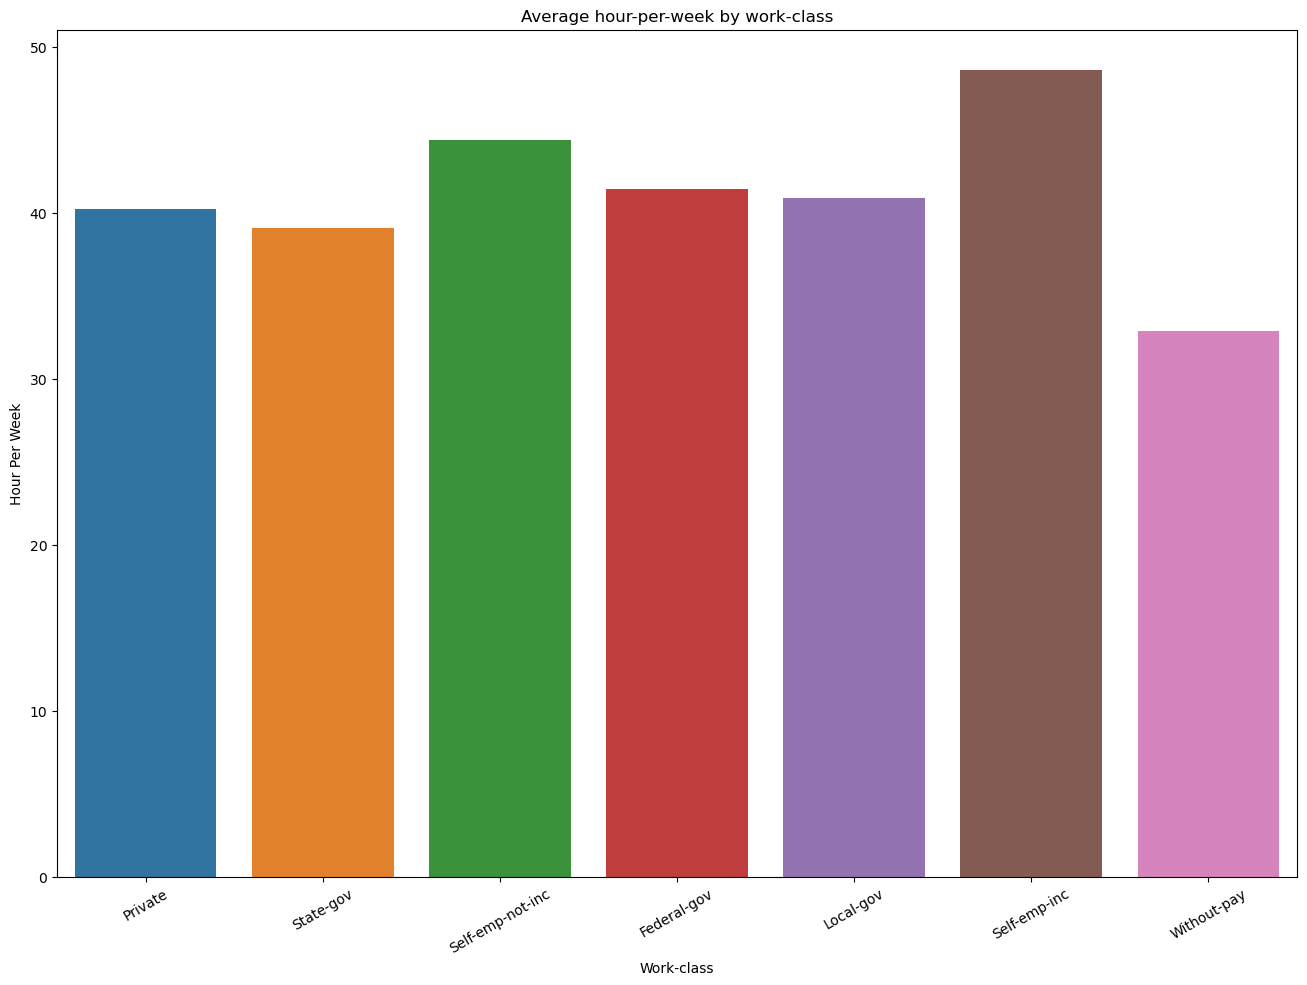

In [18]:
# Bar-plot

plt.figure(figsize=(16, 11))
sns.barplot(x='workclass', y='hours-per-week', data=df, errorbar=None)
plt.title("Average hour-per-week by work-class")
plt.xlabel('Work-class')
plt.ylabel('Hour Per Week')
plt.xticks(rotation=30)
plt.show()

In [19]:
# Analysis of bar-plot
# Average working hours in each work-class field.
# There are seven unique work-class categories; people work over 30 hours in all categories. Those
# self-employed tend to work longer than others in different work classes. Those who work without pay are 
# working the least hours.

# Proposed Question?
# Is it realistic that people in this 1994 census work 30+ hours a week without pay?

In [20]:
# Univariate Analysis

# Purpose: Univariate Analysis is the most straightforward form to analyse and describe data. However, the main reason for this 
# analysis uses the data to explain, for example, finding a pattern in average hours worked per week.

# In our univariate analysis, we focus on the "hours-per-week" column, which represents the hours worked per week during
# 1994 within the data-set

# 1. Studying the average hours per week
average_hours_per_week = df['hours-per-week'].mean()
print('Average hours per week: ','{:.2f}'.format(average_hours_per_week) + '\n')

# 2. Studying the maximum hours per week
max_hours_per_week = df['hours-per-week'].max()
print('The maximum hours per week:', '{:.2f}'.format(max_hours_per_week) + '\n')

# 3. Studying the minimum hours per week
min_hours_per_week = df['hours-per-week'].min()
print('The minimum hours per week:', '{:.2f}'.format(min_hours_per_week) + '\n')

# 4. Studying the range of hours per week
range_hours_per_week = max_hours_per_week - min_hours_per_week
print('The range of hours per week:', '{:.2f}'.format(range_hours_per_week) + '\n')

Average hours per week:  40.91

The maximum hours per week: 99.00

The minimum hours per week: 1.00

The range of hours per week: 98.00



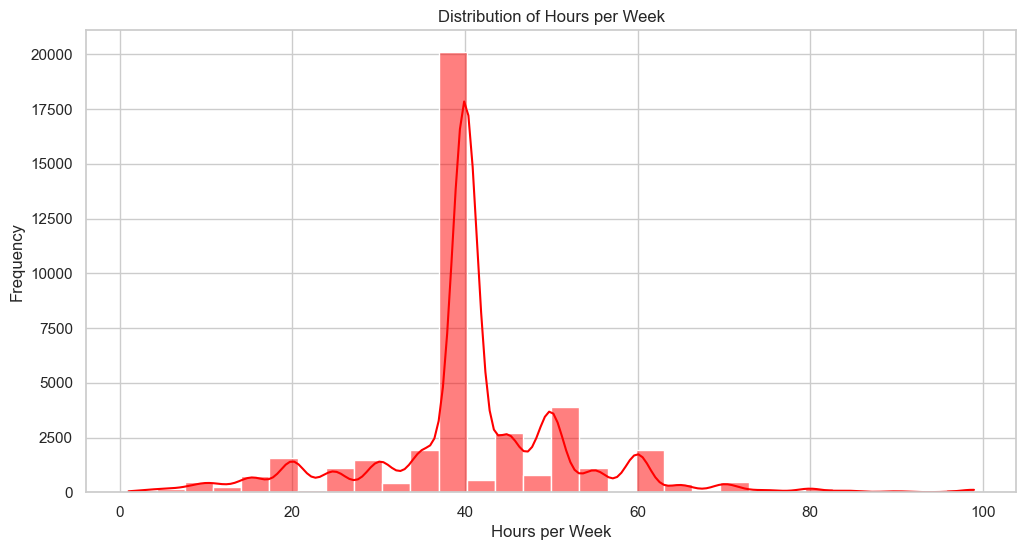

In [21]:
# Set the style for the plot
sns.set(style="whitegrid")

# Plotting the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['hours-per-week'], bins=30, kde=True, color='red')

plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.title('Distribution of Hours per Week')

# Show the plot
plt.show()

# This hist-plot reveals that most people tend to work 40 hour weeks on average, with around 20000 people working 40 
# hours in this data-set.

In [22]:
# Bivariate Analysis:

# Purpose: A bivariate analysis aims to investigate the relationship between two variables. It is helpful to determine 
# whether those chosen variables contain a specific correlation, which can be beneficial to researchers.

# In our bivariate analysis, we focus on increasing age and decreasing the amount of working hours somebody does.
# We will analyse the age and hours per week column.

In [23]:
# Correlation:

# Seeing if any correlation exists between these two columns

X_bivariate = df['age']
y_bivariate = df['hours-per-week']

bivariate_corr = X_bivariate.corr(y_bivariate)

print("The correlation between age and hour-per-week?: ", bivariate_corr)

# Analysis:
# With a correlation coefficient of approximately 0.07 between age and hours-per-week, it suggests a very weak 
# positive correlation. A correlation coefficient close to zero indicates a low linear relationship between the two 
# variables. Indicating age generally doesn't affect the number of hours somebody works in this data-set. Despite
# the general consensus that as age increases, work productivity slows down.

The correlation between age and hour-per-week?:  0.10178642542128036


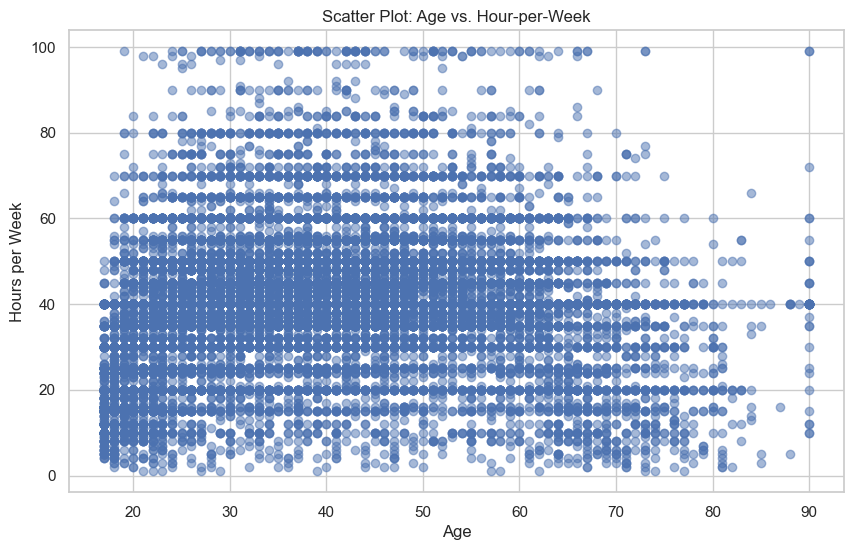

In [24]:
# Scatter plot for Age vs. Hour-per-week
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['hours-per-week'], alpha=0.5)
plt.title('Scatter Plot: Age vs. Hour-per-Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()


In [25]:
# Proposed Questions:
# An outlier represents somebody aged 90 working nearly 100 hours, is tha realistic?, or even working at all?
# how are people aged 65 + working 80+ hours, again is this realistic and how is this possible?

df_90 = df[df['age'] > 70]

# Calculate the average hours worked for people over 70
average_hours_90 = df_90['hours-per-week'].mean()

print(f'Average hours worked for people over 70-year-olds: {average_hours_90:.2f} hours per week')

# People over 70 working, on avereage 26.81 hours is not realistic, or maybe 20 years ago times were different and 
# retirement wasn't till much later?


Average hours worked for people over 70-year-olds: 28.98 hours per week


In [26]:

# Identify columns to encode
columns_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Initializing the encoder
encoder = OrdinalEncoder()

# Fit and transform each selected column
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

# Display the encoded DataFrame
print(df.head())

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   67        2.0  366425       10.0               16             0.0   
1   17        2.0  244602        2.0                8             4.0   
2   31        2.0  174201        9.0               13             2.0   
3   58        5.0  110199        5.0                4             2.0   
4   25        5.0  149248       15.0               10             4.0   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0         3.0           1.0   4.0     1.0         99999             0   
1         7.0           3.0   4.0     1.0             0             0   
2         3.0           0.0   4.0     1.0             0             0   
3        13.0           0.0   4.0     1.0             0             0   
4         7.0           1.0   2.0     1.0             0             0   

   hours-per-week  native-country  income_>50K  
0              60            38.0            1  
1              15       

In [27]:
# Classification Model:

# Classifying whether somebody makes more then 50k or not, '1' indicating they do '0', indicating they don't

# RFE: 

# Assuming you have already defined 'df'


X = df.drop(columns=['income_>50K', 'native-country'])
y = df['income_>50K']  
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize the estimator using Logistic Regression
estimator = LogisticRegression(max_iter=1000)

# Initialize RFE with the estimator and the number of features most suitable to classify the income_class
num_features_to_select = 5  # You can change this value as needed
rfe = RFE(estimator, n_features_to_select=num_features_to_select)

# Fit RFE to the scaled training data
rfe.fit(X_train_scaled, y_train)

# Get the ranking of each feature (1 = selected, 2 = not selected)
feature_ranking = rfe.ranking_

# Create a list of selected feature names
selected_features_rfe = [feature for feature, ranking in zip(X.columns, feature_ranking) if ranking == 1]

# Print the selected features
print("Selected Features for predicting income_>50K:")
print(selected_features_rfe)

Selected Features for predicting income_>50K:
['age', 'educational-num', 'gender', 'capital-gain', 'hours-per-week']


In [28]:
# Studying the correlation between (RFE selected features) and income_>50K

age_corr = df['age'].corr(df['income_>50K'])
print("Correlation between 'age' and income: ", age_corr, '\n')

educational_num_corr = df['educational-num'].corr(df['income_>50K'])
print("Correlation between 'educational-num' and income: ", educational_num_corr, '\n')

gender_corr = df['gender'].corr(df['income_>50K'])
print("Correlation between 'gender' and income: ", gender_corr, '\n')

capital_gain_corr = df['capital-gain'].corr(df['income_>50K'])
print("Correlation between 'capital-gain' and income: ", capital_gain_corr , '\n')

hours_corr = df['hours-per-week'].corr(df['income_>50K'])
print("Correlation between 'hours_corr' and income: ",hours_corr , '\n')

Correlation between 'age' and income:  0.23759651666719508 

Correlation between 'educational-num' and income:  0.3344319216961215 

Correlation between 'gender' and income:  0.21565778574480532 

Correlation between 'capital-gain' and income:  0.22167072901478682 

Correlation between 'hours_corr' and income:  0.22791799432170398 



In [29]:
# Analysis of correlation:

# Age and Income:
# The correlation between these columns is 0.2376, indicating a positive correlation

# Educational Number and Income:
# The correlation coefficient is 0.3344, indicating a moderately positive correlation. Based on the data, having a 
# higher education level is linked to earning an income of over $50,000.

# Gender and Income:
# The correlation coefficient is 0.2157. Indicating a weak positive correlation.

# Capital Gain and Income:
# The correlation coefficient is 0.2217. This implies that higher capital gains are associated with higher income 
# above $50K.

# Hours per Week and Income:
# The correlation coefficient is 0.2279. This indicates a positive correlation, suggesting that hours per week may not
# always have a higher income.

In [50]:
# Selecting the appropriate features as X_features and 'income_>50K' as y_income_>50K
X = df[['age', 'educational-num', 'gender', 'capital-gain', 'hours-per-week']]
y = df['income_>50K']

# Splitting the data into training and testing sets

# Using an 80/20 train-test split ratio is a common practice in machine learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

# Printing the train-test shape
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (32581, 5)
Shape of X_test: (8146, 5)
Shape of y_train: (32581,)
Shape of y_test: (8146,)


In [53]:
# Initialise and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Number of Correct Predictions
correct_predictions = (predictions == y_test).sum()

print("Number of Correct Predictions:", correct_predictions)


prediction_length = len(model.predict(X_test))
print("Number of Predictions:",prediction_length)

Number of Correct Predictions: 6659
Number of Predictions: 8146


/Users/justinferreira/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
# Reporting on the accuracy:

# Calculate accuracy by (number of correct predictions / total predictions)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for 'selected columns' vs. 'Income >= 50k':", round(accuracy * 100, 2))

Accuracy for 'selected columns' vs. 'Income >= 50k': 81.75


In [55]:
# Analysis and evalutating the Accuracy:

# Analysis of accuracy for the selected columns and income >=50k using a training set size of 80% produced an accuracy of 
# 81.75% indicating that the selected columns have a 81.75% chance of classifying whether an individual makes above
# 50k or not. Again '1' indicating yes, whilst '0' indciates no.

# Futhermore 80%+ indicates the model has performed well. However, further analysis can be done to enhance the model's
# accuracy and gaining further understanding.


In [56]:
# Other classification features:

# Confusion Matrix is a table used to define the performance of a classification algorithm

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5842  300]
 [1187  817]]


In [57]:
# Analysis on Confusion report:

# True Negative: 5842
# Number of predictions correctly predicted as those who make lower then 50k '0'

# False Positive: 300
# Predictions predicted as income above 50k but were not above 50k.

# False Negative: 1187
# Predictions predicted as income not above 50k but were actually above 50k.

# True Positive 817
# Number of predictions correctly predicted as those who make above then 50k '1'

In [58]:
# F1-Score and ROC Curve:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc


# F1 is interpreted as a harmonic mean of the precision and recall. Closer to 1 the better

f1 = f1_score(y_test, predictions)

print ("F1_Score: ", f1)

# AUC-ROC Curve: the receving operating characteristic curve plots the true positive versus the false positive. It
# tells how much model is fit for recognising classes. Higher the AUC, the better the model is at recognising people
# with incomes lower and above 50k.


roc = roc_auc_score(y_test, predictions)

print("Area under the ROC curve: ", roc)

F1_Score:  0.5235501441845563
Area under the ROC curve:  0.6794203029954419


In [59]:
# Analysis on F1-Score and ROC Curve

# F1 Score of 0.5236 suggests that there is a moderate balance between precision and recall in this classification
# model.

# Area Under the ROC Curve of 0.6794 indicates a fair result on the overall model.

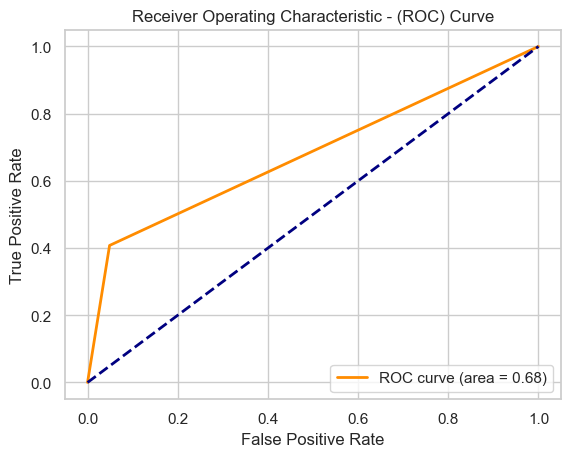

In [60]:
# Area under the ROC Curve Visualisation:

# Calculating the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Calculating the AUC score
roc_auc = auc(fpr, tpr)

# Plotting the line to represent ROC Curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
# This dotted line represents no predictive value
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [61]:
# The visualisation shows the ROC Curve. Classifiers that give curves closer to the top-left corner indicate better
# performance. The closer it comes to the 45-degree diagonal of the ROC space, the less accurate the test. In my
# case, my model accuracy is quite close to the no predictive line and quite far from the top left corner of the graph.
# Indicating that there is room for improvement in my model, especially in accurately identifying instances where income
# exceeds 50k or doesn't.

In [62]:
# Overall Classification Report:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names = ['<50k', '>=50k']))

              precision    recall  f1-score   support

        <50k       0.83      0.95      0.89      6142
       >=50k       0.73      0.41      0.52      2004

    accuracy                           0.82      8146
   macro avg       0.78      0.68      0.71      8146
weighted avg       0.81      0.82      0.80      8146



In [63]:
# KNN Analysis

#5. KNN Model: Supervised learning

# The purpose of KNN is to make classifications about the group individual data point. KNN tries to predict the correct
# class for the test data by calculating the distance between the test data and all training points. However, then
# selecting the K number of points which is closet to the test data

# Initialise the KNN model with K=1
knn = KNeighborsClassifier(n_neighbors=1)

# Training the KNN model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
predicted = knn.predict(X_test)

In [64]:
# Accuracy is the basic measure of a classifier

# Calculate the accuracy of the KNN model on the test set
accuracy = accuracy_score(y_test, predicted)

print(f"Accuracy of the KNN model: {accuracy:.2f}")

Accuracy of the KNN model: 0.77


In [65]:
# Analysis of KNN results:

# The accuracy of the KNN model to classify rating based on the above features where K = 1 produced an accuracy 
# of 0.77 or 77%. Indicating that the model correctly predicted 77% of the test data's ratings.

# KNN Classifier:
# KNeighboursClassifier was set to 1, indicating that the model considers the labels of the nearest one 
# neighbour when classifying whether the sombodies income is above >50k ('1') or below <50k ('0').

# Whilst 0.77% accuracy is an acceptable result, there is always room for improvement through tuning KNN and 
# looking at other methods of evaluation such as confusion matrix, recall and F1 Score. With the sole purpose 
# of getting a greater understanding of this model's performance.

# However, tuning Hyper-parameter K too low can cause underfitting, or too high can cause overfitting, so it's important
# to adjust this current model to ensure underfitting isn't an issue and to attempt to improve the model's overall 
# accuracy.

In [66]:
# Tuning current KNN model:

# Initialise the tuned KNN model with K=20
knn = KNeighborsClassifier(n_neighbors=20)

# Training the KNN model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
predicted = knn.predict(X_test)

In [67]:
# Accuracy on the tuned KNN model:

# Calculate the accuracy of the tuned KNN model on the test set
accuracy = accuracy_score(y_test, predicted)

print(f"Accuracy of the KNN model: {accuracy:.2f}")

Accuracy of the KNN model: 0.82


In [68]:
# Analysis of Tuned KNN Model:

# The KNN model being tuned K=20 changed the total accuracy. Indicating
# 82% of ratings are correctly classified on the two nearest neighbours when making a prediction
# on the rating. 

# Comparison with original KNN Model:
# The accuracy between K=1 and K=20 differed as the tuned KNN model achieved a higher 
# accuracy. There could be a few reasons why this has occurred. Generally, when the K value is
# set to a lower value, it can cause overfitting, making it more prone to outliers. Whilst the 
# original model would do a better job avoiding overfitting. 

# Thoughts:
# Choosing the correct value of k is a process called parameter tuning and is essential for better accuracy
# and especially for better performance. Further tuning could be implemented to ensure the model's better 
# classification on rating.

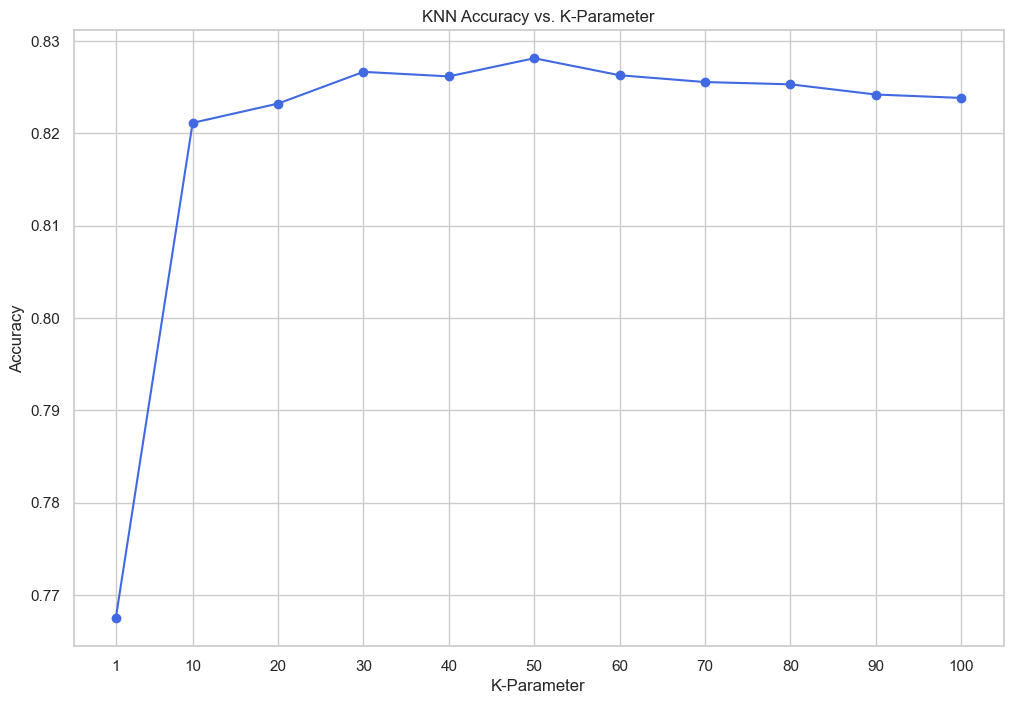

In [69]:
# Diagram below showing the impact of tuning K on the model's accuracy.
k_values = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

k_accuracy_scores = []

# Loop through different K values and compute accuracy for each
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy =accuracy_score(y_test, y_pred)
    k_accuracy_scores.append(accuracy)

# Creating a plot to visualise the increase of 'K' on the accuracy
plt.figure(figsize=(12, 8))
plt.plot(k_values, k_accuracy_scores, marker='o', linestyle='-',color='royalblue')
plt.title('KNN Accuracy vs. K-Parameter')
plt.xlabel('K-Parameter')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [70]:
# Analysis of KNN Accuracy vs K.Paramater

# The visualisation above shows the peek of K ia round K-Parameter (15) and remains steady until K-Parameter (100). The
# lowest point was K=1, which could suffer from over-fitting in this model. However, throughout the entire model. The 
# K-Parameter remains stable and consistent throughout the k x-range values, indicating the consistency of 
# the model, meaning overfitting or unfitting is improbable.

In [71]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Load a dataset (for example, the Iris dataset)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7994107537441689


In [ ]:
# Assuming your DataFrame X has the necessary features
# Assuming your DataFrame X has the necessary features
feature_names = X.columns.tolist()

plt.figure(figsize=(100, 80))
plot_tree(clf, feature_names=feature_names, class_names=list(map(str, y.unique())), filled=True)
plt.show()
